In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [2]:
dataset = MNIST(root='data/', download=True, transform=ToTensor())

In [3]:
image.shape

NameError: name 'image' is not defined

In [ ]:
image.squeeze().shape

torch.Size([1, 28, 28])


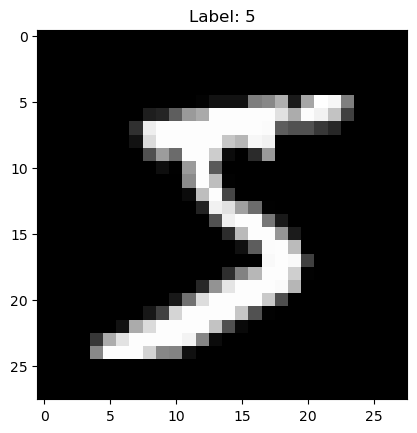

In [4]:
image, label = dataset[0]
print(image.shape)
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Label: {label}')
plt.show()

In [5]:
# Let's demonstrate squeeze() behavior with different shapes
print("=== Understanding squeeze() ===")

# Original MNIST image shape
print(f"Original MNIST image shape: {image.shape}")
print(f"After squeeze(): {image.squeeze().shape}")
print()

# Create a tensor with shape (3, 28, 28) - like RGB image
rgb_tensor = torch.randn(3, 28, 28)
print(f"RGB-like tensor shape (3, 28, 28): {rgb_tensor.shape}")
print(f"After squeeze(): {rgb_tensor.squeeze().shape}")
print()

# Create a tensor with shape (1, 3, 28, 28) - batch of 1 RGB image
batch_rgb_tensor = torch.randn(1, 3, 28, 28)
print(f"Batch RGB tensor shape (1, 3, 28, 28): {batch_rgb_tensor.shape}")
print(f"After squeeze(): {batch_rgb_tensor.squeeze().shape}")
print()

# YOUR PREVIOUS QUESTION: Create a tensor with shape (28, 28, 1) - height x width x channel
hwc_tensor = torch.randn(28, 28, 1)
print(f"HWC tensor shape (28, 28, 1): {hwc_tensor.shape}")
print(f"After squeeze(): {hwc_tensor.squeeze().shape}")
print("✅ YES! The size-1 dimension at the end gets removed!")
print()

# YOUR NEW QUESTION: Create a tensor with shape (28, 1, 28) - size-1 in the middle
middle_one_tensor = torch.randn(28, 1, 28)
print(f"Middle-1 tensor shape (28, 1, 28): {middle_one_tensor.shape}")
print(f"After squeeze(): {middle_one_tensor.squeeze().shape}")
print("✅ YES! The size-1 dimension in the middle gets removed!")
print()

# Create a tensor with multiple dimensions of size 1
multi_ones_tensor = torch.randn(1, 1, 28, 1, 28)
print(f"Multiple size-1 dims (1, 1, 28, 1, 28): {multi_ones_tensor.shape}")
print(f"After squeeze(): {multi_ones_tensor.squeeze().shape}")
print()

print("KEY RULE: squeeze() only removes dimensions that have size 1!")
print("It doesn't matter WHERE the size-1 dimensions are - they all get removed!")

=== Understanding squeeze() ===
Original MNIST image shape: torch.Size([1, 28, 28])
After squeeze(): torch.Size([28, 28])

RGB-like tensor shape (3, 28, 28): torch.Size([3, 28, 28])
After squeeze(): torch.Size([3, 28, 28])

Batch RGB tensor shape (1, 3, 28, 28): torch.Size([1, 3, 28, 28])
After squeeze(): torch.Size([3, 28, 28])

HWC tensor shape (28, 28, 1): torch.Size([28, 28, 1])
After squeeze(): torch.Size([28, 28])
✅ YES! The size-1 dimension at the end gets removed!

Middle-1 tensor shape (28, 1, 28): torch.Size([28, 1, 28])
After squeeze(): torch.Size([28, 28])
✅ YES! The size-1 dimension in the middle gets removed!

Multiple size-1 dims (1, 1, 28, 1, 28): torch.Size([1, 1, 28, 1, 28])
After squeeze(): torch.Size([28, 28])

KEY RULE: squeeze() only removes dimensions that have size 1!
It doesn't matter WHERE the size-1 dimensions are - they all get removed!


In [6]:
val_size = 10000
train_size = len(dataset) - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
len(train_dataset), len(val_dataset)

(50000, 10000)

In [7]:
batch_size = 128

In [8]:
train_loader = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size * 2, shuffle=False, num_workers=4, pin_memory=True)

batch shape: torch.Size([128, 1, 28, 28])


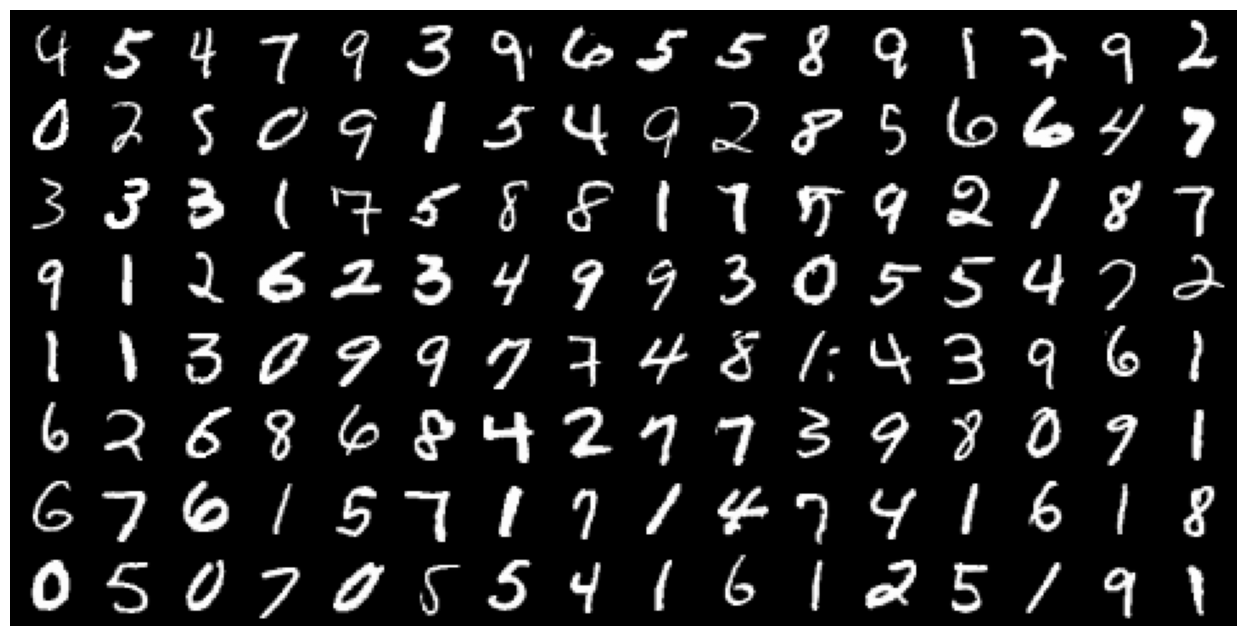

In [9]:
for images, _ in train_loader:
    print(f"batch shape: {images.shape}")
    plt.figure(figsize=(16, 8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    plt.show()
    break  # Show only the first batch for demonstration

In [10]:
for images, labels in train_loader:
    print(f"Batch shape: {images.shape}, Labels shape: {labels.shape}")
    input = images.reshape(images.shape[0], -1)  
    print(f"Input shape after squeeze: {input.shape}")
    break  # Show only the first batch for demonstration

Batch shape: torch.Size([128, 1, 28, 28]), Labels shape: torch.Size([128])
Input shape after squeeze: torch.Size([128, 784])


In [11]:
input_size = input.shape[-1]
hidden_size = 32

In [12]:
layer1 = nn.Linear(input_size, hidden_size)

In [13]:
input.shape

torch.Size([128, 784])

In [14]:
layer1_output = layer1(input)
layer1_output.shape

torch.Size([128, 32])

In [15]:
relu_output = F.relu(layer1_output)
print(f'min value layer1_output: {layer1_output.min().item()}. min value after ReLU: {relu_output.min().item()}')
print(f'max value layer1_output: {layer1_output.max().item()}. max value after ReLU: {relu_output.max().item()}')

min value layer1_output: -0.6902827024459839. min value after ReLU: 0.0
max value layer1_output: 0.7022932171821594. max value after ReLU: 0.7022932171821594


In [16]:
output_size = 10
layer2 = nn.Linear(hidden_size, output_size)

In [17]:
layer2_output = layer2(relu_output)
print(f'Output shape: {layer2_output.shape}')

Output shape: torch.Size([128, 10])


In [18]:
F.cross_entropy(layer2_output, labels)

tensor(2.3268, grad_fn=<NllLossBackward0>)

In [19]:
class MNISTModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(x.shape[0], -1)  # Flatten the input
        out = self.layer1(x)
        out = F.relu(out) 
        out = self.layer2(out)  
        return out
    
    def training_step(self, batch):
        images, labels = batch
        out = self.forward(images)
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self.forward(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print(f'Epoch [{epoch}], val_loss: {result["val_loss"]:.4f}, val_acc: {result["val_acc"]:.4f}')

In [20]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [21]:
input_size = 28 * 28
hidden_size = 32
output_size = 10

In [22]:
model = MNISTModel(input_size, hidden_size, output_size)

In [23]:
for t in model.parameters():
    print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [24]:
for images, labels in train_loader:
    outputs = model(images)
    loss = F.cross_entropy(outputs, labels)
    print(f'Loss: {loss.item()}')
    break

print(f'output shape: {outputs.shape}')


Loss: 2.307255983352661
output shape: torch.Size([128, 10])


In [25]:
def get_device():
    return torch.device('mps' if torch.mps.is_available() else 'cpu')

In [26]:
device = get_device()
device

device(type='mps')

In [27]:
def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [28]:
for images, labels in train_loader:
    print(f"Batch shape: {images.shape}, Labels shape: {labels.shape}")
    print(f"Images device before moving: {images.device}")
    images = to_device(images, device)
    print(f"Images moved to device: {images.device}")
    break

Batch shape: torch.Size([128, 1, 28, 28]), Labels shape: torch.Size([128])
Images device before moving: cpu
Images moved to device: mps:0


In [29]:
class DeviceDataLoader():
    def __init__(self, dataloader, device):
        self.dataloader = dataloader
        self.device = device

    def __iter__(self):
        for batch in self.dataloader:
            yield to_device(batch, self.device)

    def __len__(self):
        return len(self.dataloader)

In [30]:
def some_numbers():
    yield 10
    yield 20
    yield 30

for val in some_numbers():
    print(val)

10
20
30


In [31]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

In [32]:
for xb, yb in val_loader:
    print(f'xb.device: {xb.device}, yb.device: {yb.device}')
    print(f'yb: {yb}')
    break

xb.device: mps:0, yb.device: mps:0
yb: tensor([7, 3, 5, 1, 2, 5, 4, 0, 1, 6, 4, 4, 2, 5, 4, 3, 6, 8, 4, 3, 9, 2, 6, 8,
        1, 3, 6, 2, 9, 8, 9, 1, 2, 9, 4, 5, 4, 1, 0, 5, 7, 7, 9, 4, 0, 0, 2, 2,
        6, 0, 5, 3, 7, 7, 1, 3, 9, 7, 8, 2, 7, 9, 6, 0, 4, 5, 6, 3, 2, 4, 6, 0,
        3, 4, 0, 2, 2, 0, 0, 2, 8, 0, 3, 1, 2, 4, 3, 7, 1, 4, 4, 5, 9, 4, 5, 2,
        0, 5, 9, 0, 4, 4, 5, 0, 4, 8, 8, 9, 2, 1, 6, 3, 4, 2, 1, 4, 4, 5, 4, 7,
        5, 2, 9, 2, 6, 3, 1, 7, 1, 2, 4, 1, 1, 7, 6, 2, 3, 6, 2, 3, 9, 0, 2, 8,
        6, 9, 2, 3, 8, 9, 8, 3, 8, 3, 4, 1, 2, 5, 1, 9, 1, 8, 4, 3, 2, 5, 6, 9,
        7, 1, 6, 4, 5, 1, 1, 1, 6, 7, 1, 4, 6, 4, 4, 0, 0, 7, 5, 7, 1, 5, 3, 7,
        8, 9, 0, 4, 0, 7, 2, 3, 7, 9, 7, 4, 9, 4, 7, 7, 2, 7, 9, 0, 8, 2, 1, 5,
        1, 7, 5, 6, 4, 6, 3, 8, 7, 2, 4, 6, 7, 2, 6, 3, 3, 2, 2, 2, 7, 5, 3, 3,
        3, 6, 6, 7, 4, 5, 7, 5, 8, 8, 8, 9, 6, 1, 0, 3], device='mps:0')


In [33]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [34]:
def train(epochs, lr, model, train_loader, val_loader, opt_func=optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = []

    for epoch in range(epochs):
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [35]:
model = MNISTModel(input_size, hidden_size, output_size)
to_device(model, device)

MNISTModel(
  (layer1): Linear(in_features=784, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=10, bias=True)
)

In [36]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 2.304966688156128, 'val_acc': 0.09414062649011612}]

In [37]:
history += train(5, 0.5, model, train_loader, val_loader)

Epoch [0], val_loss: 0.2430, val_acc: 0.9267
Epoch [1], val_loss: 0.1766, val_acc: 0.9488
Epoch [2], val_loss: 0.1627, val_acc: 0.9499
Epoch [3], val_loss: 0.1625, val_acc: 0.9531
Epoch [4], val_loss: 0.1425, val_acc: 0.9577


In [38]:
history += train(5, 0.1, model, train_loader, val_loader)

Epoch [0], val_loss: 0.1157, val_acc: 0.9658
Epoch [1], val_loss: 0.1154, val_acc: 0.9667
Epoch [2], val_loss: 0.1164, val_acc: 0.9668
Epoch [3], val_loss: 0.1154, val_acc: 0.9659
Epoch [4], val_loss: 0.1144, val_acc: 0.9673


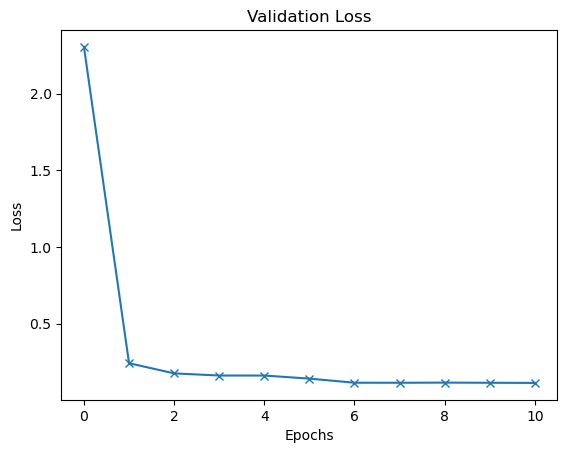

In [39]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.show()

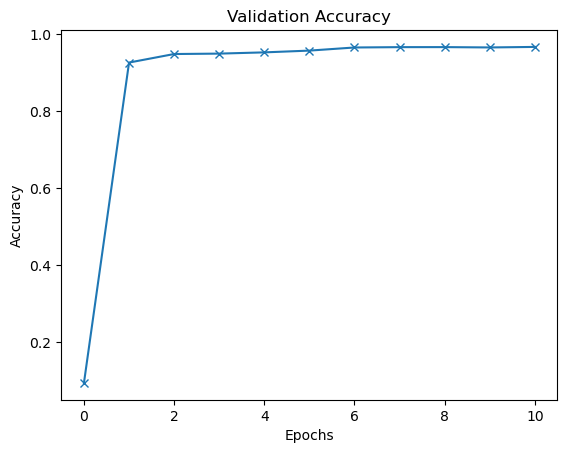

In [40]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.show()

In [41]:
print(f"Final validation accuracy: {history[-1]['val_acc']:.4f}")
print(f"Final validation loss: {history[-1]['val_loss']:.4f}")

Final validation accuracy: 0.9673
Final validation loss: 0.1144


### testing

In [42]:
test_dataset = MNIST(root='data/', train=False, transform=ToTensor())

In [43]:
def predict_image(image, model):
    xb = to_device(image.unsqueeze(0), device)  
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

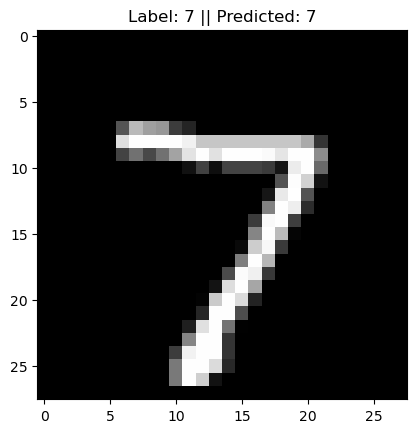

In [44]:
img, label = test_dataset[0]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f'Label: {label} || Predicted: {predict_image(img, model)}')
plt.show()

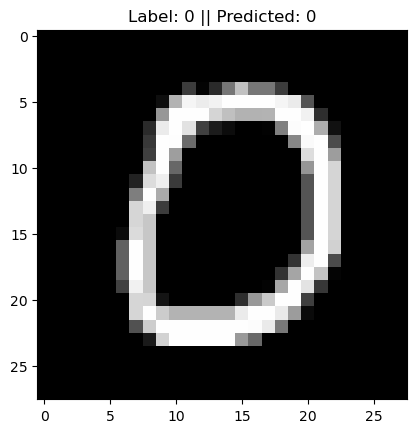

In [45]:
img, label = test_dataset[10]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f'Label: {label} || Predicted: {predict_image(img, model)}')
plt.show()

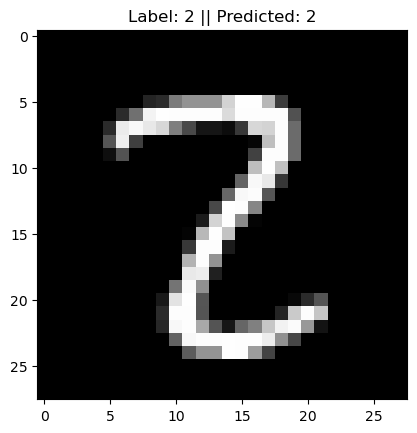

In [46]:
img, label = test_dataset[1839]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f'Label: {label} || Predicted: {predict_image(img, model)}')
plt.show()

In [47]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size=256), device)
result = evaluate(model, test_loader)
print(f"Test accuracy: {result['val_acc']:.4f}")
print(f"Test loss: {result['val_loss']:.4f}")


Test accuracy: 0.9717
Test loss: 0.0926


In [48]:
torch.save(model.state_dict(), 'mnist-model2.pth')

# Model2

In [49]:
input_size = 28 * 28
hidden_size = 64
output_size = 10

In [50]:
model2 = MNISTModel(input_size, hidden_size, output_size)
model2 = to_device(model2, device)
history2 = [evaluate(model2, val_loader)]
history2 += train(5, 0.0001, model2, train_loader, val_loader)


Epoch [0], val_loss: 2.2963, val_acc: 0.0729
Epoch [1], val_loss: 2.2912, val_acc: 0.0840
Epoch [2], val_loss: 2.2859, val_acc: 0.0937
Epoch [3], val_loss: 2.2806, val_acc: 0.1077
Epoch [4], val_loss: 2.2751, val_acc: 0.1227


In [51]:
history2 += train(5, 0.001, model2, train_loader, val_loader)

Epoch [0], val_loss: 2.2104, val_acc: 0.2899
Epoch [1], val_loss: 2.1281, val_acc: 0.4348
Epoch [2], val_loss: 2.0339, val_acc: 0.5791
Epoch [3], val_loss: 1.9297, val_acc: 0.6588
Epoch [4], val_loss: 1.8181, val_acc: 0.6987


In [52]:
history2 += train(5, 0.01, model2, train_loader, val_loader)

Epoch [0], val_loss: 0.8665, val_acc: 0.8258
Epoch [1], val_loss: 0.5901, val_acc: 0.8595
Epoch [2], val_loss: 0.4893, val_acc: 0.8724
Epoch [3], val_loss: 0.4390, val_acc: 0.8825
Epoch [4], val_loss: 0.4072, val_acc: 0.8877


In [53]:
history2 += train(5, 0.1, model2, train_loader, val_loader)

Epoch [0], val_loss: 0.3193, val_acc: 0.9077
Epoch [1], val_loss: 0.2799, val_acc: 0.9179
Epoch [2], val_loss: 0.2509, val_acc: 0.9280
Epoch [3], val_loss: 0.2332, val_acc: 0.9323
Epoch [4], val_loss: 0.2079, val_acc: 0.9399


In [54]:
history2 += train(5, 0.3, model2, train_loader, val_loader)

Epoch [0], val_loss: 0.1867, val_acc: 0.9452
Epoch [1], val_loss: 0.1620, val_acc: 0.9512
Epoch [2], val_loss: 0.1372, val_acc: 0.9599
Epoch [3], val_loss: 0.1322, val_acc: 0.9618
Epoch [4], val_loss: 0.1192, val_acc: 0.9634


In [55]:
history2 += train(5, 0.5, model2, train_loader, val_loader)

Epoch [0], val_loss: 0.1173, val_acc: 0.9634
Epoch [1], val_loss: 0.1342, val_acc: 0.9602
Epoch [2], val_loss: 0.1111, val_acc: 0.9675
Epoch [3], val_loss: 0.1088, val_acc: 0.9694
Epoch [4], val_loss: 0.0984, val_acc: 0.9719


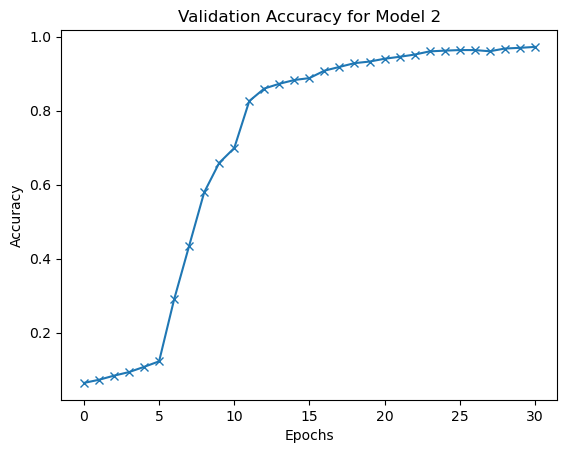

In [56]:
accuracies2 = [x['val_acc'] for x in history2]
plt.plot(accuracies2, '-x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy for Model 2')
plt.show()

In [57]:
result = evaluate(model2, test_loader)
print(f"Test accuracy: {result['val_acc']:.4f}")
print(f"Test loss: {result['val_loss']:.4f}")


Test accuracy: 0.9757
Test loss: 0.0830


# model3

In [58]:
input_size = 28 * 28
hidden_size = 16
output_size = 10

In [59]:
model3 = MNISTModel(input_size, hidden_size, output_size)
model3 = to_device(model3, device)

In [60]:
history3 = [evaluate(model3, val_loader)]

In [61]:
history3 += train(5, 0.1, model3, train_loader, val_loader)

Epoch [0], val_loss: 0.3674, val_acc: 0.8934
Epoch [1], val_loss: 0.3194, val_acc: 0.9051
Epoch [2], val_loss: 0.2897, val_acc: 0.9148
Epoch [3], val_loss: 0.2776, val_acc: 0.9197
Epoch [4], val_loss: 0.2571, val_acc: 0.9294


In [62]:
history3 += train(5, 0.5, model3, train_loader, val_loader)

Epoch [0], val_loss: 0.3561, val_acc: 0.8929
Epoch [1], val_loss: 0.3185, val_acc: 0.9067
Epoch [2], val_loss: 0.2903, val_acc: 0.9183
Epoch [3], val_loss: 0.2486, val_acc: 0.9285
Epoch [4], val_loss: 0.2657, val_acc: 0.9232


In [63]:
history3 += train(5, 0.8, model3, train_loader, val_loader)

Epoch [0], val_loss: 0.2751, val_acc: 0.9216
Epoch [1], val_loss: 0.3329, val_acc: 0.9007
Epoch [2], val_loss: 0.2763, val_acc: 0.9134
Epoch [3], val_loss: 0.2995, val_acc: 0.9091
Epoch [4], val_loss: 0.2488, val_acc: 0.9272


In [64]:
history3 += train(5, 0.4, model3, train_loader, val_loader)

Epoch [0], val_loss: 0.2119, val_acc: 0.9371
Epoch [1], val_loss: 0.2098, val_acc: 0.9383
Epoch [2], val_loss: 0.2164, val_acc: 0.9347
Epoch [3], val_loss: 0.2403, val_acc: 0.9316
Epoch [4], val_loss: 0.2190, val_acc: 0.9369


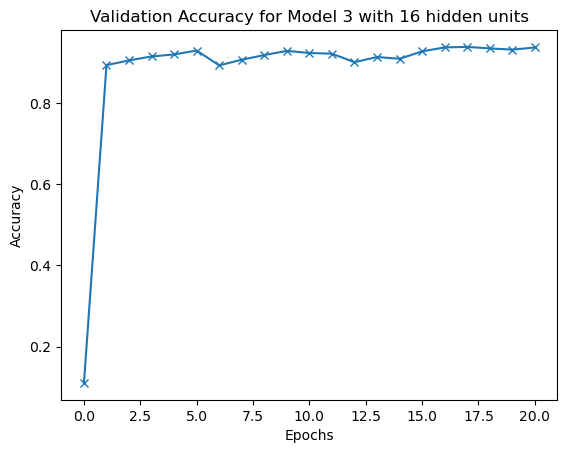

In [65]:
accuracies3 = [x['val_acc'] for x in history3]
plt.plot(accuracies3, '-x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy for Model 3 with 16 hidden units')
plt.show()

In [66]:
result = evaluate(model3, test_loader)
print(f"Test accuracy: {result['val_acc']:.4f}")
print(f"Test loss: {result['val_loss']:.4f}")

Test accuracy: 0.9377
Test loss: 0.2035


COMPARISON

ARCHITECTURE:
Model 1: 784 → 32 → 10
Model 2: 784 → 64 → 10
Model 3: 784 → 16 → 10

PARAMETERS:
Model 1: 25,450 parameters
Model 2: 50,890 parameters
Model 3: 12,730 parameters
Model 2 has 2.0x more parameters than Model 1
Model 1 has 2.0x more parameters than Model 3

TRAINING APPROACH:
Model 1: Conservative (LR: 0.5 → 0.1)
Model 2: Progressive (LR: 0.0001 → 0.001 → 0.01 → 0.1 → 0.3 → 0.5)
Model 3: Aggressive (LR: 0.1 → 0.5 → 0.8 → 0.4)

FINAL PERFORMANCE:
Model 1 - Test Accuracy: 0.9673 (96.7%)
Model 1 - Test Loss:     0.1144

Model 2 - Test Accuracy: 0.9377 (93.8%)
Model 2 - Test Loss:     0.2035

Model 3 - Test Accuracy: 0.9369 (93.7%)
Model 3 - Test Loss:     0.2190

TRAINING EFFICIENCY:
Model 1: 10 epochs to reach 96.7%
Model 2: 30 epochs to reach 93.8%
Model 3: 20 epochs to reach 93.7%

 Most Efficient: Model 1 (0.0967 accuracy per epoch)

PARAMETER EFFICIENCY:
Model 1: 0.38 accuracy points per 10K parameters
Model 2: 0.18 accuracy points per 10K parameters
Model 3: 

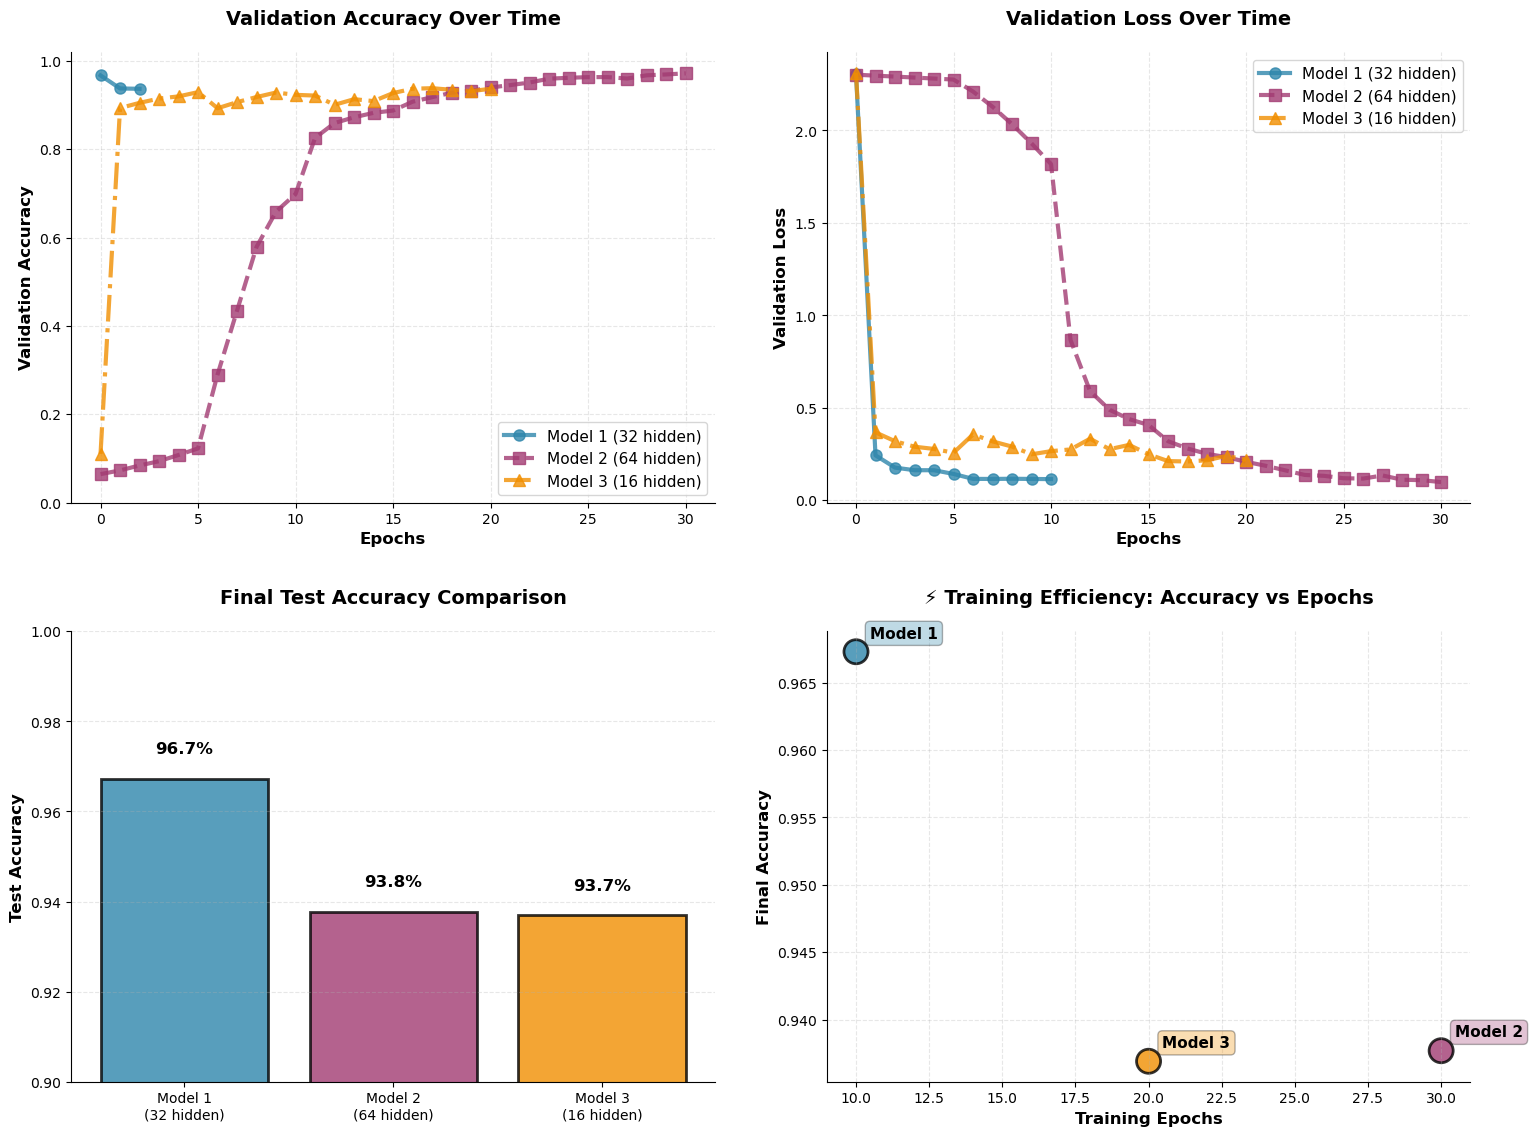


CONCLUSION:
The winner is Model 1 with 96.7% accuracy!
Most efficient model: Model 1
Best parameter efficiency: Model 3


In [67]:
# COMPREHENSIVE THREE-MODEL COMPARISON

print("COMPARISON")
print("=" * 60)
print()

# Model Architecture Comparison
print("ARCHITECTURE:")
print(f"Model 1: {input_size} → 32 → {output_size}")
print(f"Model 2: {input_size} → 64 → {output_size}")
print(f"Model 3: {input_size} → 16 → {output_size}")
print()

# Parameters Count
model1_params = sum(p.numel() for p in model.parameters())
model2_params = sum(p.numel() for p in model2.parameters())
model3_params = sum(p.numel() for p in model3.parameters())

print("PARAMETERS:")
print(f"Model 1: {model1_params:,} parameters")
print(f"Model 2: {model2_params:,} parameters")
print(f"Model 3: {model3_params:,} parameters")
print(f"Model 2 has {(model2_params/model1_params):.1f}x more parameters than Model 1")
print(f"Model 1 has {(model1_params/model3_params):.1f}x more parameters than Model 3")
print()

# Training Approach Comparison
print("TRAINING APPROACH:")
print("Model 1: Conservative (LR: 0.5 → 0.1)")
print("Model 2: Progressive (LR: 0.0001 → 0.001 → 0.01 → 0.1 → 0.3 → 0.5)")
print("Model 3: Aggressive (LR: 0.1 → 0.5 → 0.8 → 0.4)")
print()

# Performance Comparison
print("FINAL PERFORMANCE:")
model1_acc = history[-1]['val_acc']
model1_loss = history[-1]['val_loss']
model2_acc = result['val_acc']
model2_loss = result['val_loss']
model3_acc = history3[-1]['val_acc']
model3_loss = history3[-1]['val_loss']

print(f"Model 1 - Test Accuracy: {model1_acc:.4f} ({model1_acc:.1%})")
print(f"Model 1 - Test Loss:     {model1_loss:.4f}")
print()
print(f"Model 2 - Test Accuracy: {model2_acc:.4f} ({model2_acc:.1%})")
print(f"Model 2 - Test Loss:     {model2_loss:.4f}")
print()
print(f"Model 3 - Test Accuracy: {model3_acc:.4f} ({model3_acc:.1%})")
print(f"Model 3 - Test Loss:     {model3_loss:.4f}")
print()

# Performance Analysis - Find the winner
accuracies = [model1_acc, model2_acc, model3_acc]
model_names = ["Model 1", "Model 2", "Model 3"]
best_idx = accuracies.index(max(accuracies))
worst_idx = accuracies.index(min(accuracies))

# print("🏆 PERFORMANCE RANKING:")
# sorted_models = sorted(zip(model_names, accuracies), key=lambda x: x[1], reverse=True)
# for i, (name, acc) in enumerate(sorted_models):
#     emoji = "🥇" if i == 0 else "🥈" if i == 1 else "🥉"
#     print(f"{emoji} {name}: {acc:.1%}")
# print()

# Training Efficiency
print("TRAINING EFFICIENCY:")
model1_epochs = len(history) - 1  
model2_epochs = len(history2) - 1
model3_epochs = len(history3) - 1

print(f"Model 1: {model1_epochs} epochs to reach {model1_acc:.1%}")
print(f"Model 2: {model2_epochs} epochs to reach {model2_acc:.1%}")
print(f"Model 3: {model3_epochs} epochs to reach {model3_acc:.1%}")

# Efficiency analysis
efficiency_scores = [acc/epochs for acc, epochs in zip(accuracies, [model1_epochs, model2_epochs, model3_epochs])]
most_efficient_idx = efficiency_scores.index(max(efficiency_scores))
print(f"\n Most Efficient: {model_names[most_efficient_idx]} ({efficiency_scores[most_efficient_idx]:.4f} accuracy per epoch)")
print()

# Parameter vs Performance Analysis
print("PARAMETER EFFICIENCY:")
param_efficiency = [acc/params*10000 for acc, params in zip(accuracies, [model1_params, model2_params, model3_params])]
for i, (name, eff) in enumerate(zip(model_names, param_efficiency)):
    print(f"{name}: {eff:.2f} accuracy points per 10K parameters")
best_param_eff_idx = param_efficiency.index(max(param_efficiency))
print(f"Best Parameter Efficiency: {model_names[best_param_eff_idx]}")
print()

# Visualization
print("TRAINING CURVES COMPARISON:")
plt.style.use('default')  # Reset to default style
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Define colors and styles for consistency
colors = ['#2E86AB', '#A23B72', '#F18F01']  # Blue, Purple, Orange
markers = ['o', 's', '^']
linestyles = ['-', '--', '-.']
model_labels = ['Model 1 (32 hidden)', 'Model 2 (64 hidden)', 'Model 3 (16 hidden)']

# 1. Accuracy comparison
for i, (acc_data, color, marker, style, label) in enumerate(zip(
    [accuracies, accuracies2, accuracies3], colors, markers, linestyles, model_labels)):
    ax1.plot(acc_data, color=color, marker=marker, linestyle=style, 
             linewidth=3, markersize=8, label=label, alpha=0.8)

ax1.set_xlabel('Epochs', fontsize=12, fontweight='bold')
ax1.set_ylabel('Validation Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('Validation Accuracy Over Time', fontsize=14, fontweight='bold', pad=20)
ax1.legend(fontsize=11, loc='lower right')
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_ylim(0, 1.02)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# 2. Loss comparison
losses_data = [[x['val_loss'] for x in history], 
               [x['val_loss'] for x in history2], 
               [x['val_loss'] for x in history3]]

for i, (loss_data, color, marker, style, label) in enumerate(zip(
    losses_data, colors, markers, linestyles, model_labels)):
    ax2.plot(loss_data, color=color, marker=marker, linestyle=style, 
             linewidth=3, markersize=8, label=label, alpha=0.8)

ax2.set_xlabel('Epochs', fontsize=12, fontweight='bold')
ax2.set_ylabel('Validation Loss', fontsize=12, fontweight='bold')
ax2.set_title('Validation Loss Over Time', fontsize=14, fontweight='bold', pad=20)
ax2.legend(fontsize=11, loc='upper right')
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# 3. Final Performance Bar Chart
final_accs = [model1_acc, model2_acc, model3_acc]
bars = ax3.bar(['Model 1\n(32 hidden)', 'Model 2\n(64 hidden)', 'Model 3\n(16 hidden)'], 
               final_accs, color=colors, alpha=0.8, edgecolor='black', linewidth=2)

# Add percentage labels on bars
for bar, acc in zip(bars, final_accs):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{acc:.1%}', ha='center', va='bottom', fontweight='bold', fontsize=12)

ax3.set_ylabel('Test Accuracy', fontsize=12, fontweight='bold')
ax3.set_title('Final Test Accuracy Comparison', fontsize=14, fontweight='bold', pad=20)
ax3.set_ylim(0.9, 1.0)
ax3.grid(True, alpha=0.3, axis='y', linestyle='--')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# 4. Training Efficiency Scatter Plot
epochs_data = [model1_epochs, model2_epochs, model3_epochs]
scatter = ax4.scatter(epochs_data, final_accs, s=[300, 300, 300], 
                     c=colors, alpha=0.8, edgecolors='black', linewidth=2)

# Add model labels
for i, (epochs, acc, label) in enumerate(zip(epochs_data, final_accs, model_labels)):
    ax4.annotate(f'Model {i+1}', (epochs, acc), xytext=(10, 10), 
                textcoords='offset points', fontweight='bold', fontsize=11,
                bbox=dict(boxstyle='round,pad=0.3', facecolor=colors[i], alpha=0.3))

ax4.set_xlabel('Training Epochs', fontsize=12, fontweight='bold')
ax4.set_ylabel('Final Accuracy', fontsize=12, fontweight='bold')
ax4.set_title('⚡ Training Efficiency: Accuracy vs Epochs', fontsize=14, fontweight='bold', pad=20)
ax4.grid(True, alpha=0.3, linestyle='--')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

plt.tight_layout(pad=3.0)
plt.show()

print("\nCONCLUSION:")
print(f"The winner is {model_names[best_idx]} with {max(accuracies):.1%} accuracy!")
print(f"Most efficient model: {model_names[most_efficient_idx]}")
print(f"Best parameter efficiency: {model_names[best_param_eff_idx]}")